<a href="https://colab.research.google.com/github/yanin254417/Data-Mining/blob/main/4-DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas dataframes are a great data structure for tabular data.
The pandas library provides dataframes, and functions for reading data into dataframes and for analyzing, filtering, and manipulating data in very compact form.

The name is derived from the term “panel data”.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we need to give Google Colab access to Google Drive
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## Reading data into a dataframe

In [3]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# examine data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [8]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

## Visualize features

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

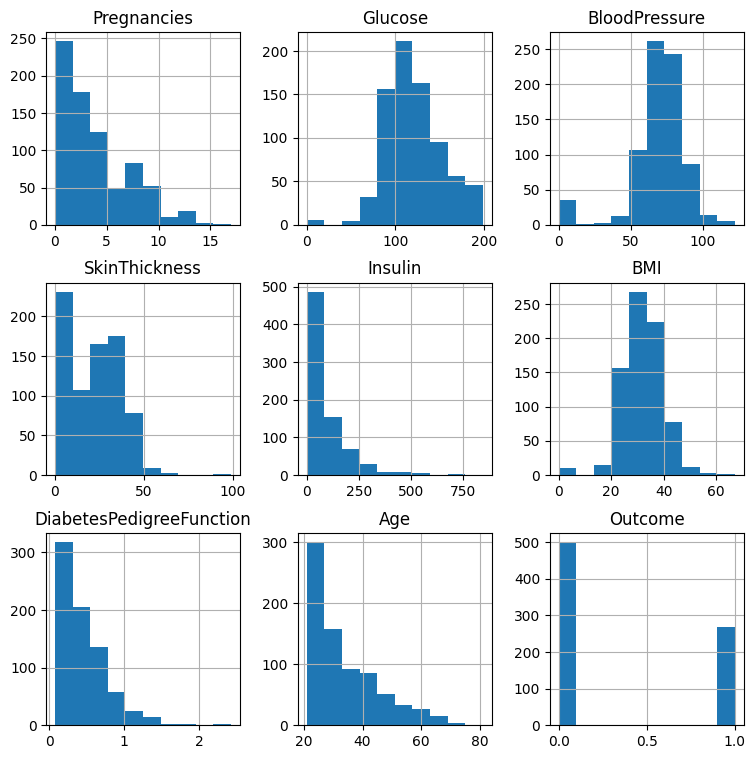

In [9]:
diabetes.hist(figsize=(9, 9))

<Axes: >

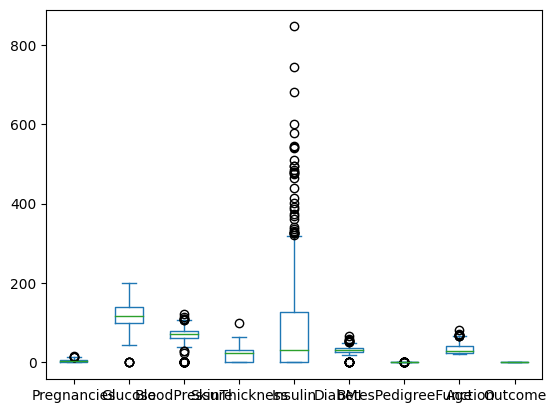

In [10]:
diabetes.plot(kind='box')

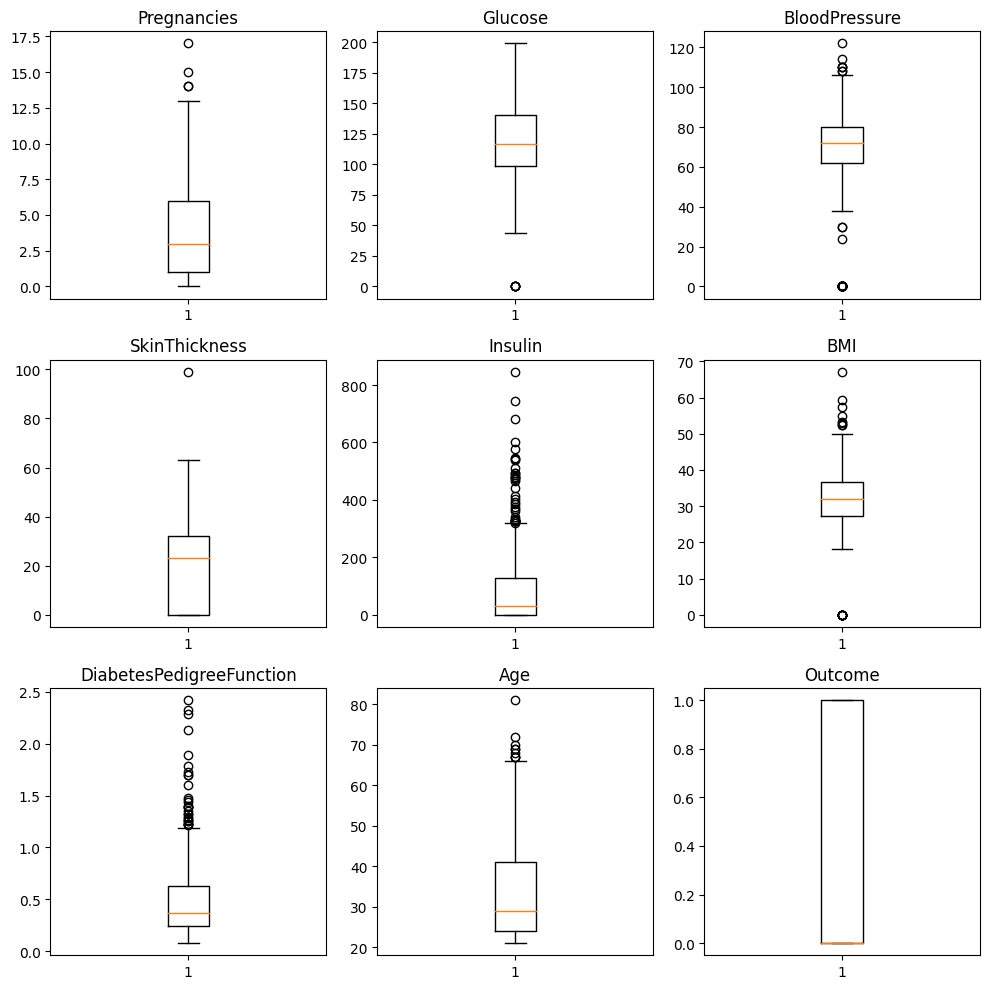

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(diabetes.iloc[:,i])
    diabetes.iloc[:,i]
    ax.set_title(diabetes.columns[i])
    ax.tick_params(axis='y')

    #Checking if column names are equal to columns we expect to be logarithmic
    if diabetes.columns[i] == 'RDEP' or diabetes.columns[i] == 'RMED':
        ax.semilogy()

plt.tight_layout()

## Inspect missing or null data

In [12]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

One way to aggregate data

In [13]:
diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].mean()

Outcome
0    30.052632
1    31.500000
Name: Age, dtype: float64

In [14]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


In [15]:
diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count()

Outcome
0    19
1    16
Name: Age, dtype: int64

There are 0 values for blood pressure!?

In [16]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

Total :  5


In [17]:
diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count()

Outcome
0    3
1    2
Name: Age, dtype: int64

Invalid plasma glucose levels of value 0

In [18]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])

Total :  227


In [19]:
diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count()

Outcome
0    139
1     88
Name: Age, dtype: int64

For normal people, skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0: 227.

And even more...

In [20]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count()

Total :  11


Outcome
0    9
1    2
Name: Age, dtype: int64

In [21]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count()

Total :  374


Outcome
0    236
1    138
Name: Age, dtype: int64

Here are several ways to handle invalid data values:

* Ignore/remove these cases: This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns mean to have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

* Put average/mean values: This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

* Avoid using features: It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but it's hard to predict that.

We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [22]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)
